In [1]:
# this script shows you how functions can be used to make your code more modular
# and reuseable

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# how do we reuse code?

# by using functions!
print("Hello world!")

Hello world!


In [3]:
temp_in_f = 99
temp_in_c = ((temp_in_f - 32) * (5/9))
print(temp_in_c)

37.22222222222222


In [4]:
# instead of repeating the above code every time we want to use it on a different temp value
# we can instead wrap it in a function


def fahr_to_cel(temp_f):
    """
    This function converts temp in F to C

    arguments:
        temp_f: temperature in Fahrenheit

    returns:
        temp_c: temperature in Celsius
    """
    temp_in_c = ((temp_f - 32) * (5/9))
    return temp_in_c



In [5]:
new_temp_c = fahr_to_cel(99)

In [6]:
new_temp_c

37.22222222222222

In [7]:
# we can also do the calculations directly in the return statement

def fahr_to_cel_implicit(temp_f):
    """
    This function converts temp in F to C

    arguments:
        temp_f: temperature in Fahrenheit

    returns:
        temp_c: temperature in Celsius
    """
    return ((temp_f - 32) * (5/9))


In [8]:
fahr_to_cel_implicit(99)

37.22222222222222

In [9]:
# if a variable is defined inside a function but is not in the return statement
# it will not be accessible outside of the function
# this is called a local variable
# for example m below
def testing_returns(temp_f, y):
    """
    This function converts temp in F to C

    arguments:
        temp_f: temperature in Fahrenheit

    returns:
        temp_c: temperature in Celsius
    """
    temp_in_c = ((temp_f - 32) * (5/9))
    x = 2
    z = x + y
    m = x * y
    return temp_in_c, x, z


In [10]:
test_values = testing_returns(99, 1)

In [11]:
test_values[2]

3

In [12]:
# we can create functions to plot our results:

def visualisation(data, title):
  """
  This function plots a dataset, given a numpy array and a string title

  Arguments:
    data: numpy
  """

  fig = plt.figure(figsize=(5.0, 7.0), layout="compressed")

  # set up individual axes
  axes1 = fig.add_subplot(2, 1, 1)
  axes2 = axes1.twinx()
  axes3 = fig.add_subplot(2, 1, 2)

  # plot some data
  # top panel
  axes1.plot(np.mean(data, axis=0), c="black")
  axes2.plot(np.amin(data, axis=0), c="grey", linestyle="--")
  axes1.set_xlabel("Days")
  axes1.set_ylabel("Mean inflammation")
  axes2.set_ylabel("Min. inflammation", c="grey")

  #lower panel
  heatmap = axes3.imshow(data, aspect="auto")
  cbar = fig.colorbar(heatmap, location="bottom")
  cbar.set_label("Inflammation")
  axes3.set_xlabel("Days")
  axes3.set_ylabel("Patient ID #")

  axes1.set_xlim(-0.5, 39.5)
  axes3.set_xlim(-0.5, 39.5)

  fig.suptitle(title)

  save_path = "/content/swc-python/plots/"

  plt.savefig(save_path + title + ".png")

In [13]:
# to use this function, we need to have data to plot:

# Download 2 files and store in the swc-python folder
!wget -P swc-python https://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip
!wget -P swc-python https://swcarpentry.github.io/python-novice-inflammation/files/code/python-novice-inflammation-code.zip

--2023-11-17 11:14:49--  https://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip
Resolving swcarpentry.github.io (swcarpentry.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to swcarpentry.github.io (swcarpentry.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22554 (22K) [application/zip]
Saving to: ‘swc-python/python-novice-inflammation-data.zip’

python-novice-infla 100%[===================>]  22.03K  --.-KB/s    in 0s      

2023-11-17 11:14:49 (92.8 MB/s) - ‘swc-python/python-novice-inflammation-data.zip’ saved [22554/22554]

--2023-11-17 11:14:49--  https://swcarpentry.github.io/python-novice-inflammation/files/code/python-novice-inflammation-code.zip
Resolving swcarpentry.github.io (swcarpentry.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to swcarpentry.github.io (swcarpentry.github.io)|185.199.108.153|:443... connected.

In [14]:
# Extract .zip files inside the folder swc-python/
!unzip /content/swc-python/python-novice-inflammation-code.zip -d /content/swc-python/
!unzip /content/swc-python/python-novice-inflammation-data.zip -d /content/swc-python/

Archive:  /content/swc-python/python-novice-inflammation-code.zip
  inflating: /content/swc-python/code/argv_list.py  
  inflating: /content/swc-python/code/arith.py  
  inflating: /content/swc-python/code/check.py  
  inflating: /content/swc-python/code/count_stdin.py  
  inflating: /content/swc-python/code/gen_inflammation.py  
  inflating: /content/swc-python/code/line_count.py  
  inflating: /content/swc-python/code/my_ls.py  
  inflating: /content/swc-python/code/readings_01.py  
  inflating: /content/swc-python/code/readings_02.py  
  inflating: /content/swc-python/code/readings_03.py  
  inflating: /content/swc-python/code/readings_04.py  
  inflating: /content/swc-python/code/readings_05.py  
  inflating: /content/swc-python/code/readings_06.py  
  inflating: /content/swc-python/code/readings_07.py  
  inflating: /content/swc-python/code/readings_08.py  
  inflating: /content/swc-python/code/readings_09.py  
  inflating: /content/swc-python/code/rectangle.py  
  inflating: /con

In [15]:
# create a folder to stick plots
!mkdir -p /content/swc-python/plots

In [16]:
data = np.loadtxt("/content/swc-python/data/inflammation-07.csv", delimiter=",")

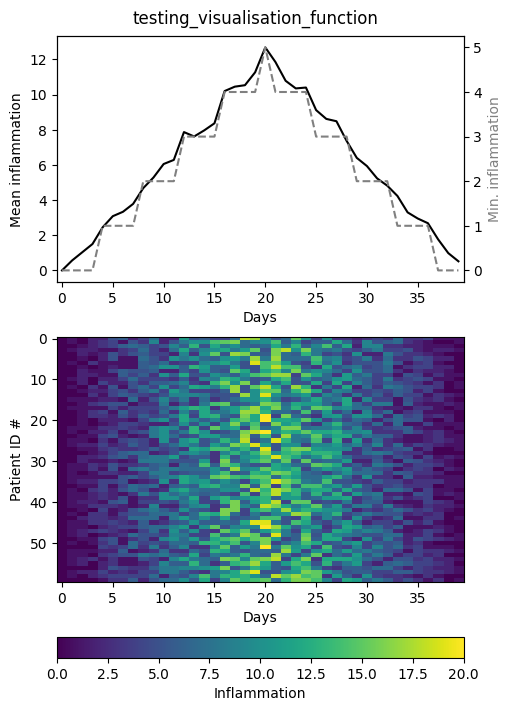

In [17]:
visualisation(data, "testing_visualisation_function")